## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# creating a env object of TicTacToe class
env = TicTacToe()

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Default state of board
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [6]:
# All the valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

In [7]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
# Exploitation: Action corresponding to max q-value of the current state
# Exploration: Choosing and action (randomly)

def epsilon_greedy_policy(state, t):
    eps = min_eps + (max_eps - min_eps) * np.exp(- decayRate * t)
    x = np.random.random()
        
    if x > eps:
        s = Q_state(state)
        # Exploitation
        action = max(Q_dict[s], key = Q_dict[s].get)   
    else:
        actionPos = [a for a in env.action_space(state)[0]] 
        # Exploration
        action = actionPos[np.random.choice(range(len(actionPos)))]    
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [10]:
# Initialise states to be tracked
def initialise_tracking_states():
    QValueSamples = [
        ('x-x-x-x-x-x-x-x-x',(1,1)),
        ('x-x-x-x-x-x-x-x-x',(6,5)),
        ('x-4-5-x-x-x-x-x-x',(5,3)),
        ('x-8-x-x-x-1-x-x-x',(4,5))]
    for QValue in QValueSamples:
        state = QValue[0]
        action = QValue[1]
        States_track[state][action] = []

In [11]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

#### Define hyperparameters  ---write your code here

In [13]:
# Number of episodes
episodes = 500000

# Learning Rate
learningRate = 0.001

# Discount Factor
discountFactor_Gamma = 0.95

max_eps = 1.0

min_eps = 0.001

# Epsilon Decay Rate
decayRate = 0.0001

# After # episodes states tracked will be saved
threshold = 100

# After # episodes Q-dict or Q-table will be saved
policy_threshold = 1000

In [14]:
initialise_tracking_states()

### Q-update loop ---write your code here

In [15]:
start_time = time.time()

for episode in range(episodes):
    ##### Start writing your code from the next line
    env = TicTacToe()
    currentState = env.state 
    # Add current state to the dict
    add_to_dict(currentState)
    complete = False  
    
    while complete != True:  
        currentState_1 = Q_state(currentState)
        # Calling epsilon greedy policy method
        currentAction = epsilon_greedy_policy(currentState, episode)
        # Retrieving reward
        futureState, reward, complete = env.step(currentState, currentAction)
        futureState_1 = Q_state(futureState)
        add_to_dict(futureState)

        if complete != True:
            futureMaximumQ = max(Q_dict[futureState_1], key = Q_dict[futureState_1].get)
            # Getting action corresponding to the Q-value maximum above for next state
            Q_dict[currentState_1][currentAction] += learningRate * ((reward + (discountFactor_Gamma * (Q_dict[futureState_1][futureMaximumQ])) - Q_dict[currentState_1][currentAction])) 
        else:
            # Getting action for next state
            Q_dict[currentState_1][currentAction] += learningRate * ((reward - Q_dict[currentState_1][currentAction]))

        # Moving to next state
        currentState = futureState
        
     # Tracking the States
    if((episode + 1) % threshold) == 0:
        save_tracking_states()

    # Q Dictionary will be saved for every 1000th episode
    if((episode + 1) % policy_threshold) == 0:
        save_obj(Q_dict, 'Policy')
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

In [16]:
print('Total time taken - ', elapsed_time)

Total time taken -  228.91172289848328


#### Check the Q-dictionary

In [17]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.6324852737698134,
              (0, 3): -0.6326268868880641,
              (0, 5): -0.6346946456903141,
              (0, 7): -0.6336932158428993,
              (0, 9): -0.633737529838902,
              (1, 1): -0.6336721698138016,
              (1, 3): -0.6348506042039604,
              (1, 5): -0.634040362588231,
              (1, 7): -0.632725729152445,
              (1, 9): -0.63482771703855,
              (2, 1): -0.6334762415526832,
              (2, 3): -0.6339144346167256,
              (2, 5): -0.6326401083263992,
              (2, 7): -0.6327026251938175,
              (2, 9): -0.6328518991686888,
              (3, 1): -0.6348968617367271,
              (3, 3): -0.6343020188516494,
              (3, 5): -0.634345715213351,
              (3, 7): -0.6329474966328851,
              (3, 9): -0.6350051867104225,
              (4, 1): -0.631957529853909,
              (4, 3): -0.6322648825037158,
              (4, 5): 

In [18]:
len(Q_dict)

47898

In [19]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [20]:
# Write the code for plotting the graphs for state-action pairs tracked
def plot_StateAction_Tracking():
    plt.figure(0, figsize = (20,15))
    
    x_ax = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,1)])))
    plt.subplot(221)
    plt.title("[x-x-x-x-x-x-x-x-x][(1,1)]")
    plt.plot(x_ax, np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,1)]))
    
    x_ax = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
    plt.subplot(222)
    plt.title("[x-x-x-x-x-x-x-x-x][(6,5)]")
    plt.plot(x_ax,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
    
    x_ax = np.asarray(range(0, len(States_track['x-4-5-x-x-x-x-x-x'][(5,3)])))
    plt.subplot(223)
    plt.title("[x-4-5-x-x-x-x-x-x][(5,3)]")
    plt.plot(x_ax, np.asarray(States_track['x-4-5-x-x-x-x-x-x'][(5,3)]))
    
    x_ax = np.asarray(range(0, len(States_track['x-8-x-x-x-1-x-x-x'][(4,5)])))
    plt.subplot(224)
    plt.title("[x-8-x-x-x-1-x-x-x][(4,5)]")
    plt.plot(x_ax, np.asarray(States_track['x-8-x-x-x-1-x-x-x'][(4,5)]))

    plt.show()

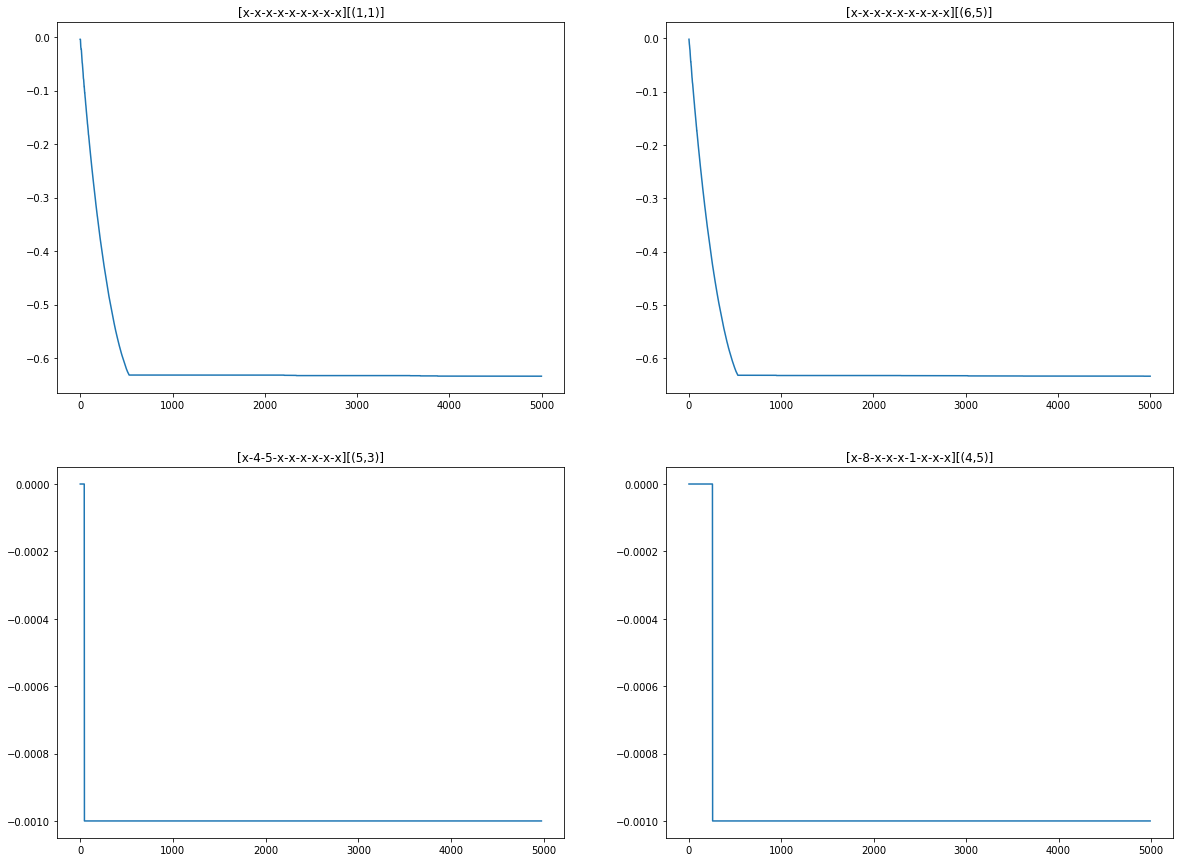

In [21]:
plot_StateAction_Tracking()

### Epsilon - decay check

In [22]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

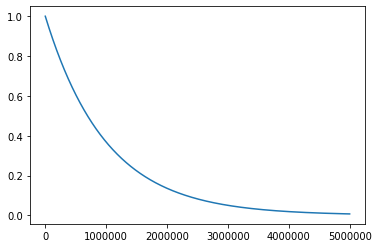

In [23]:
plt.plot(time, epsilon)
plt.show()